In [2]:
#Importing all the required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Loading the dataset from mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#Checking the dimension of the train images
train_images.shape

(60000, 28, 28)

In [5]:
#Checking the dimension of the test images
test_images.shape

(10000, 28, 28)

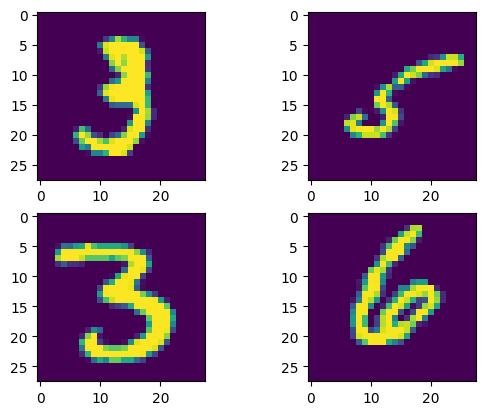

In [6]:
#Plotting some random input image
plt.subplot(221)
plt.imshow(train_images[10])
plt.subplot(222)
plt.imshow(train_images[11])
plt.subplot(223)
plt.imshow(train_images[12])
plt.subplot(224)
plt.imshow(train_images[13])
plt.show()

In [7]:
#Reshape the images to one channel from three channels for processing purpose
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [8]:
#Normalizing all the values in the range of 0 to 1 for less computation
train_images = train_images/255.0
test_images = test_images/255.0

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          51,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,562 (224.85 KB)

 Trainable params: 57,562 (224.85 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
#Train the model
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.8893 - loss: 0.3635
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - accuracy: 0.9812 - loss: 0.0595
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9865 - loss: 0.0416
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9909 - loss: 0.0288
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9932 - loss: 0.0213


In [13]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9852 - loss: 0.0446


[0.034142542630434036, 0.9889000058174133]

In [14]:
classification = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


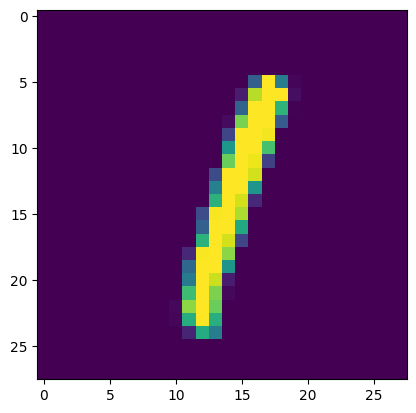

In [18]:
plt.imshow(test_images[5].reshape(28,28))

In [19]:
print(np.argmax(classification[5]))

1
